In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Libraries

In [ ]:
# libraries
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
from sklearn import preprocessing
from nltk.probability import FreqDist

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
!pip install Sastrawi
!pip install wordcloud matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.4 MB/s eta 0:00:00


Loading dataset

In [ ]:
url = 'https://drive.google.com/file/d/1Ij7xFFuPM0FTEJwdCb5qB1C_DdvCNvZq/view?usp=drive_link'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url, encoding='latin1')
df = df.dropna(axis=1)
df

,URL User,Username,Link Postingan,Waktu,Komentar,Tanggal Postingan,Tanggal Ambil,Tanggal Komentar,Bobot,Sentimen,Status Postingan
0,https://www.instagram.com/khoirulanwar01236/,khoirulanwar01236,https://www.instagram.com/p/C1KMEE7PuHG/c/1804...,161,hampir takut semalam ternyata suhu yang aku du...,12/12/2023,5/6/2024,27/12/2023,1,Positif,Sebelum Pemilu
1,https://www.instagram.com/xywxzitsbopakk/,xywxzitsbopakk,https://www.instagram.com/p/C2YtMz3PbGm/c/1803...,126,"""Pingin seblak""",12/12/2023,6/4/2024,1/30/2024,0,Positif,Sebelum Pemilu
2,https://www.instagram.com/rynpngst96/,rynpngst96,https://www.instagram.com/p/C1KMEE7PuHG/c/1793...,161,*GIBRAN*,12/16/2023,5/6/2024,27/12/2023,1,Positif,Sebelum Pemilu
3,https://www.instagram.com/igumrhrj/,igumrhrj,https://www.instagram.com/p/C2YtMz3PbGm/c/1821...,133,01 atau 03 aja ya ÃÂ°Ã Â¸Ã¢ÂÂ¢Ã Â,12/12/2023,6/4/2024,1/23/2024,833.333,Positif,Sebelum Pemilu
4,https://www.instagram.com/nimow8286/,nimow8286,https://www.instagram.com/p/C2YtMz3PbGm/c/1802...,133,01 dan 03 the best ÃÂ°Ã Â¸ÃÂÃ Â½ÃÂ°Ã Â¸Ã¢Â...,12/12/2023,6/4/2024,1/23/2024,0,Positif,Sebelum Pemilu
...,...,...,...,...,...,...,...,...,...,...,...
1995,https://www.instagram.com/onochelsea/,onochelsea,https://www.instagram.com/p/C6FqfG0Pdtn/c/1798...,42 days,"Angkuhnya Ganjar, memberi selamat tanpa menyeb...",12/12/2023,6/4/2024,4/23/2024,-1,Negatif,Setelah Pemilu
1996,https://www.instagram.com/rrisa.whyni/,rrisa.whyni,https://www.instagram.com/p/C6FqfG0Pdtn/c/1802...,42 days,Giliran kita tagih menagih janji,12/12/2023,6/4/2024,4/23/2024,-1.2,Negatif,Setelah Pemilu
1997,https://www.instagram.com/agnesrtnptr/,agnesrtnptr,https://www.instagram.com/p/C6FqfG0Pdtn/c/1796...,42 days,sebut saja namanya 'pa prabowo dan pa gibran' ...,12/12/2023,6/4/2024,4/23/2024,-107.692,Negatif,Setelah Pemilu
1998,https://www.instagram.com/syendiprt/,syendiprt,https://www.instagram.com/p/C6FqfG0Pdtn/c/1802...,42 days,Gitu aja drama,12/12/2023,6/4/2024,4/23/2024,-1,Negatif,Setelah Pemilu


In [ ]:
df.drop(['Bobot'], axis=1)

,URL User,Username,Link Postingan,Waktu,Komentar,Tanggal Postingan,Tanggal Ambil,Tanggal Komentar,Sentimen,Status Postingan
0,https://www.instagram.com/khoirulanwar01236/,khoirulanwar01236,https://www.instagram.com/p/C1KMEE7PuHG/c/1804...,161,hampir takut semalam ternyata suhu yang aku du...,12/12/2023,5/6/2024,27/12/2023,Positif,Sebelum Pemilu
1,https://www.instagram.com/xywxzitsbopakk/,xywxzitsbopakk,https://www.instagram.com/p/C2YtMz3PbGm/c/1803...,126,"""Pingin seblak""",12/12/2023,6/4/2024,1/30/2024,Positif,Sebelum Pemilu
2,https://www.instagram.com/rynpngst96/,rynpngst96,https://www.instagram.com/p/C1KMEE7PuHG/c/1793...,161,*GIBRAN*,12/16/2023,5/6/2024,27/12/2023,Positif,Sebelum Pemilu
3,https://www.instagram.com/igumrhrj/,igumrhrj,https://www.instagram.com/p/C2YtMz3PbGm/c/1821...,133,01 atau 03 aja ya ÃÂ°Ã Â¸Ã¢ÂÂ¢Ã Â,12/12/2023,6/4/2024,1/23/2024,Positif,Sebelum Pemilu
4,https://www.instagram.com/nimow8286/,nimow8286,https://www.instagram.com/p/C2YtMz3PbGm/c/1802...,133,01 dan 03 the best ÃÂ°Ã Â¸ÃÂÃ Â½ÃÂ°Ã Â¸Ã¢Â...,12/12/2023,6/4/2024,1/23/2024,Positif,Sebelum Pemilu
...,...,...,...,...,...,...,...,...,...,...
1995,https://www.instagram.com/onochelsea/,onochelsea,https://www.instagram.com/p/C6FqfG0Pdtn/c/1798...,42 days,"Angkuhnya Ganjar, memberi selamat tanpa menyeb...",12/12/2023,6/4/2024,4/23/2024,Negatif,Setelah Pemilu
1996,https://www.instagram.com/rrisa.whyni/,rrisa.whyni,https://www.instagram.com/p/C6FqfG0Pdtn/c/1802...,42 days,Giliran kita tagih menagih janji,12/12/2023,6/4/2024,4/23/2024,Negatif,Setelah Pemilu
1997,https://www.instagram.com/agnesrtnptr/,agnesrtnptr,https://www.instagram.com/p/C6FqfG0Pdtn/c/1796...,42 days,sebut saja namanya 'pa prabowo dan pa gibran' ...,12/12/2023,6/4/2024,4/23/2024,Negatif,Setelah Pemilu
1998,https://www.instagram.com/syendiprt/,syendiprt,https://www.instagram.com/p/C6FqfG0Pdtn/c/1802...,42 days,Gitu aja drama,12/12/2023,6/4/2024,4/23/2024,Negatif,Setelah Pemilu


EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   URL User           2000 non-null   object
 1   Username           2000 non-null   object
 2   Link Postingan     2000 non-null   object
 3   Waktu              2000 non-null   object
 4   Komentar           2000 non-null   object
 5   Tanggal Postingan  2000 non-null   object
 6   Tanggal Ambil      2000 non-null   object
 7   Tanggal Komentar   2000 non-null   object
 8   Bobot              2000 non-null   object
 9   Sentimen           2000 non-null   object
 10  Status Postingan   2000 non-null   object
dtypes: object(11)
memory usage: 172.0+ KB


In [ ]:
#Polaritas
from textblob import TextBlob
texts = df['Komentar'].to_string()

p = TextBlob(texts).sentiment.polarity
s = TextBlob(texts).sentiment.subjectivity

print("Polaritas dari teks: ", p)
print("Subjektivitas dari teks: ", s)

Polaritas dari teks:  0.2146667637620073
Subjektivitas dari teks:  0.4916373114902528


Hasil analisis diatas menjelaskan jika:
- Polaritas merupakan sentiment negatif/positif, semakin mendekati -1 maka negatif dan 0 merupakan positif.
- Subjektivitas merupakan analisis apakah komentar termaksut objektif atau subjektif dengan jika mendekati 1 maka subjektif dan jika jauh maka objektif

Melihat distirbusi sentiment pada kolom status postingan

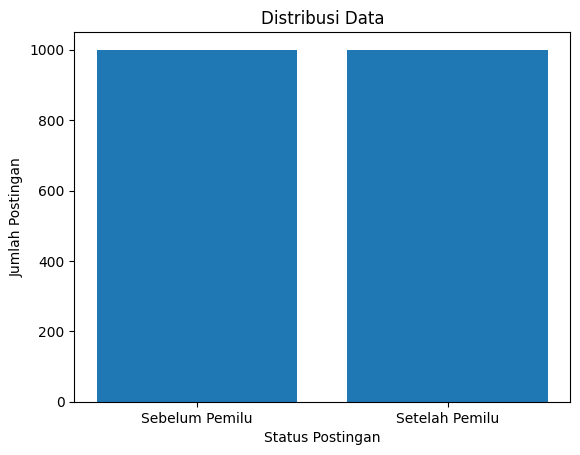

In [ ]:
# Melihat distribusi data "sentiment"
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung jumlah postingan untuk setiap status
count_status = df['Status Postingan'].value_counts()
plt.bar(count_status.index, count_status.values)

plt.title('Distribusi Data')
plt.xlabel('Status Postingan')
plt.ylabel('Jumlah Postingan')
plt.show()

Jumlah Data Non-Null per Kolom:
URL User             2000
Username             2000
Link Postingan       2000
Waktu                2000
Komentar             2000
Tanggal Postingan    2000
Tanggal Ambil        2000
Tanggal Komentar     2000
Bobot                2000
Sentimen             2000
Status Postingan     2000
dtype: int64

Total Data per Kolom:
2000


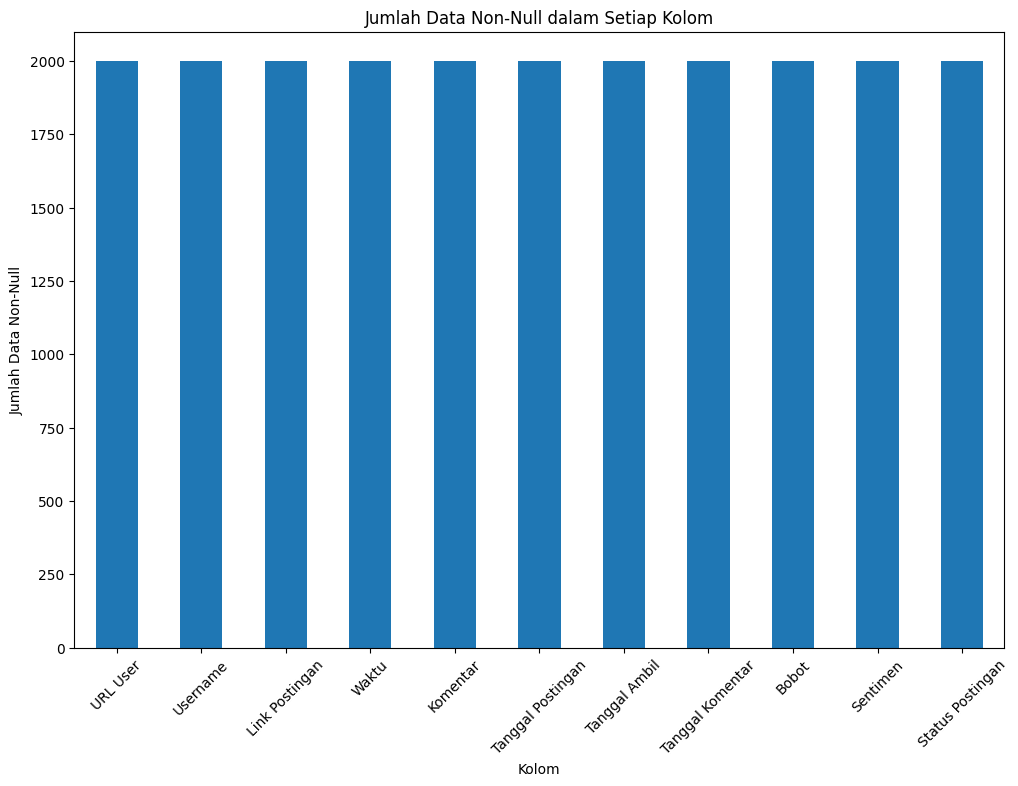

In [ ]:
jumlah_data_non_null_per_kolom = df.count()
total_data_per_kolom = df.shape[0]

# Print jumlah data non-null per kolom
print("Jumlah Data Non-Null per Kolom:")
print(jumlah_data_non_null_per_kolom)

# Print total data per kolom
print("\nTotal Data per Kolom:")
print(total_data_per_kolom)
plt.figure(figsize=(12, 8))

# Plotting
jumlah_data_non_null_per_kolom.plot(kind='bar')
plt.title('Jumlah Data Non-Null dalam Setiap Kolom')
plt.xlabel('Kolom')
plt.ylabel('Jumlah Data Non-Null')
plt.xticks(rotation=45)
plt.show()

Preprocessing

Data Normalization

In [ ]:
vocab= {
 "lo": "kamu", "gak": "tidak", "geblek": "bodoh", "bgt": "banget", "lg": "lagi", "kitenya": "kitanya", "oon": "bodoh", "kmrn": "kemarin", "skr": "sekarang", "kya": "seperti", "abege": "abg", "ato": "atau", "tapj" : "tapi", "mk" : "Mahkamah Konstitusi",
 "yg": "yang", "kmrn": "kemarin", "ertong": "artis", "gk": "tidak", "knp": "kenapa", "jd": "jadi", "ky": "seperti", "khabisan": "kehabisan", "ja": "saja", "kayagni": "seperti ini", "bapake": "bapaknya",
 "d": "di", "tar": "ntar", "sm": "sama", "teh": "teteh", "rt": "rumah tangga", "kale": "kali", "kek": "seperti", "pd": "pada", "krn": "karena", "tdk": "tidak", "Sdh": "sudah", "prilaku": "perilaku",
 "dr": "dari", "pny": "punya", "kpn": "kapan", "ancur": "hancur", "CPP": "calon pengantin pria", "CPW": "calon pengantin wanita", "org": "orang", "udh": "udah", "Situ": "kamu", "Mna": "mana", "ngina": "ngehina",
 "suer": "beneran", "minceeee": "admin", "eneg": "muak", "Yg": "yang", "dpn": "depan", "bnyk": "banyak", "mgkn": "mungkin", "ma": "sama", "lbh": "lebih", "dmana": "dimana", "pny": "punya", "udh": "udah",
 "kliatan": "kelihatan", "mna": "mana", "ga": "tidak", "byk": "banyak", "ngk": "tidak", "ellu": "kamu", "loe": "kamu", "klo": "kalau", "pecun": "pecundang", "kesian": "kasian", "Gua": "saya", "aj": "saja",
 "kau": "kamu", "dlu": "dulu", "dcekal": "dilarang", "hrs": "harus", "ny": "nya", "ni": "ini", "sgja": "sengaja", "sbrpa": "seberapa", "mrsk": "merusak", "ank": "anak", "nnton": "nonton", "Pnyanyi": "penyanyi",
 "bgini": "begini", "bukan'y": "bukanya", "bangeg": "banget", "S": "si", "bkn": "bikin", "ngjak": "ngajak", "dh": "sudah", "mw": "mau", "ttp": "tetap", "aj": "aja", "klo": "kalau", "g": "tidak", "dlm": "dalam",
 "oplas": "operasi plastik", "dek": "adek", "tp": "tetapi", "cuantik": "cantik", "cri": "cari", "ky": "seperti", "gua": "saya", "malahn": "bahkan", "pants": "pantas", "banya": "banyak", "gt": "gitu",
 "kalee": "kali", "darar": "dasar", "kamfungan": "kampungan", "jdi": "jadi", "kbanyakan": "kebanyakan", "LO": "kamu", "Jgn": "jangan", "wong": "orang", "edan": "gila", "congor": "mulut", "manah": "mana",
 "liyat": "lihat", "lgsg": "langsung", "begok": "bodoh", "aje": "saja", "ama": "sama", "kgk": "tidak", "haltis": "halu artis", "astagah": "astaga", "demen": "suka", "kumel": "kusut", "barlen": "barang loakan",
 "skrg": "sekarang", "stju": "setuju", "msuk": "masuk", "bkan": "bukan", "krna": "karena", "bnyk": "banyak", "bs": "bisa", "sna": "sana", "lbh": "lebih", "ancur": "hancur", "ngembat": "merebut", "wes": "sudah",
 "ilfil": "jijik", "ertong": "artis", "ngmg": "ngomong", "picik": "licik", "jga": "juga", "manusi": "manusia", "stupid": "bodoh", "human": "manusia", "dese": "dia", "kyak": "seperti", "pdhal": "padahal",
 "s": "story", "netijen": "netizen", "masyako": "masako", "manusah": "manusia", "begoh": "bodoh", "kampyuung": "kampung", "mba": "mbak", "better": "bagus", "curh": "curhat", "dipiara": "dipelihara",
 "lol": "tolol", "ko": "kok", "ny": "nya", "kn": "kan", "y": "ya", "kitu": "gitu", "bs": "bisa", "la": "lah", "stsus": "status", "begok": "bodoh", "jablay": "anak alay", "yutub": "youtube",
 "seseorg": "seseorang", "mreka": "mereka", "ntn": "nonton", "kaga": "tidak", "oplas": "operasi plastik", "dn": "dan", "kyknya": "kayaknya", "az": "aja", "aplg": "apalagi", "before": "sebelum", "and": "dan",
 "after": "sesudah", "pasca": "selama", "n": "dan", "filed": "gagal", "aj": "saja", "aja": "saja", "ama": "dengan", "ama": "sama", "amazing": "luarbiasa", "ampe": "sampai", "ampuuun": "ampun", "aplod": "unggah",
 "attutude": "attitude", "bahasami": "bahasamu", "bak": "seperti", "bangetttt": "banget", "bangt": "banget", "begimane": "bagaimana", "bener": "benar", "bersmaa": "bersama", "bgt": "banget", "bgtu": "begitu",
 "blajarnya": "belajarnya", "bless": "memberkati", "blg": "bicara", "blm": "belum", "bner": "bener", "bngt": "banget", "bnyk": "banyak", "bpk": "bapak", "br": "baru", "brojol": "lahir", "brp": "berapa",
 "brwibawah": "berwibawa", "bs": "bisa", "cantikk": "cantik", "cba": "coba", "class": "kelas", "comment": "komentar", "congratz": "selamat", "cra": "cara", "d": "di", "dah": "sudah", "dampe": "sampe",
 "dapet": "dapat", "dateng": "datang", "dear": "kepada", "deliv": "antar", "dibilng": "dibilang", "diliat": "dilihat", "dlm": "dalam", "dlu": "dulu", "dng": "dengan", "doyan": "suka", "dpan": "depan",
 "dpt": "dapat", "dr": "dari", "dri": "dari", "drpd": "daripada", "duren": "durian", "dy": "dia", "editanx": "editannya", "eloo": "kamu", "elu": "kamu", "emng": "emang", "fitna": "fitnah", "g": "tidak",
 "ga": "tidak", "gag": "tidak", "gak": "tidak", "gemezzzzzzz": "gemas", "gk": "tidak", "gn": "gini", "god": "tuhan", "gt": "gitu", "guling": "berguling", "hny": "hanya", "hrs": "harus", "i": "saya",
 "i2": "itu", "ilfil": "jijik", "iniii": "ini", "istiqamah": "istikamah", "j": "jam", "ja": "saja", "jd": "jadi", "jdi": "jadi", "jgn": "jangan", "jijik": "jijik", "k": "ke", "kali": "kali", "karna": "karena",
 "kasiaannn": "kasihan", "kasihaaan": "kasihan", "kasiian": "kasihan", "kasihan": "kasihan", "kbrnya": "kabar", "keliatan": "kelihatan", "keluargax": "keluarganya", "keselamatanmu": "keselamatan",
 "kh": "karena", "ky": "kayak", "lagih": "lagi", "lah": "sudah", "lg": "lagi", "lgsg": "langsung", "lo": "kamu", "loe": "kamu", "lor": "selatan", "lucuukk": "lucu", "luuuuu": "lu", "m": "mama", "mauuuuuu": "mau",
 "mgk": "mungkin", "momennya": "momentumnya", "msh": "masih", "msih": "masih", "ng": "nggak", "ngaji": "mengaji", "nggak": "tidak", "ngomong": "berbicara", "ngpain": "ngapain", "ngusir": "mengusir", "ni": "ini", "nih": "ini",
 "nt": "netizen", "ntar": "nanti", "ny": "nya", "nyari": "mencari", "p": "pasti", "pd": "pada", "pke": "pakai", "pngn": "pengen", "prnah": "pernah", "qs": "qur'an", "s": "saya", "sdh": "sudah", "sedihhh": "sedih",
 "sej": "sejak", "sii": "si", "smt": "semester", "smua": "semua", "sp": "siapa", "spertinya": "sepertinya", "st": "status", "subhanallah": "maha suci Allah", "sy": "saya", "tau": "tahu", "teman2": "teman-teman",
 "ttg": "tentang", "tuch": "itu", "ttmnya": "teman dekat", "tu": "itu", "trs": "terus", "tuh": "itu", "tuhh": "itu", "tweetnya": "ciutannya", "udah": "sudah", "udh": "sudah", "ur": "kamu", "w": "saya",
 "ya": "iya", "yg": "yang", "yi": "saya", "yuhuu": "ayo", "yuup": "benar", "zenk": "jengkel", "kagaet":"kaget", "ckp":"cukup", "lwt":"lewat", "nitezerrre":"netizen", "bgni":"begini", "hrsnya":"harusnya", "bnr":"benar", "slain":"selain", "brguna":"berguna",
 "gda":"tidak ada", "gebet":"merebut", "sesebini":"si istri", "prewi":"perawan","bejibun":"banyak", "perem":"perempuan", "ngerebut":"merebut", "ente":"kamu", "enggk":"tidak", "Enggk":"tidak", "kere":"miskin", "elmu":"ilmu", "ngrebut":"merebut", "brempuan":"perempuan",
 "lonte":"pelacur", "deseu":"dia", "brasa":"merasa", "nyaho":"tau", "yng":"yang", "orng":"orang", "ngerusak":"merusak", "kbhgiaan":"kebahagiaan", "krja":"kerja","mlh":"malah","morotin":"memanfaatkan","psti":"pasti", "akn":"akan",
 "mnghampirimu":"menghampirimu", "Gue":"aku", "Idupnya":"hidupnya", "ajah":"saja", "ogah":"tidak mau", "dwngerin":"mendengarkan", "pngen":"pengen","kreatip":"kreatif","memalukab":"memalukan", "terxta":"ternyata", "uda":"sudah", "gue":"aku", "buk":"bu", "ibuk":"ibu",
 "loe":"kamu", "TAI":"kotoran", "jngan":"jangan", "knpa":"kenapa", "bawa2":"bawa", "elo":"kamu", "blenyek":"lembek", "KGA":"tidak","SEKALU":"sekali", "ustad":"ustadz", "sndr":"sendiri", "kacian":"kasian","tw":"tau", "bwt":"untuk","bodo":"bodoh","doank":"doang",
 "mecin":"micin", "jngn2":"jangan jangan", "bngtt":"banget", "bego":"bodoh", "mommy":"ibu", "gosib":"gosip", "lu":"kamu", "govlok":"goblok", "prcya":"percaya", "slgkuh":"selingkuh", "baek":"baik", "ktamu":"katamu","fikir":"pikir","pke":"pakai", "mkanya":"makanya",
 "kbanyakan":"kebanyakan", "buluk":"jelek","akhiry":"akhirnya", "kobil":"billy", "cinlok":"cinta lokasi", "BABANG":"abang", "kuin":"ratu", "guatelnye":"genitnya", "kek":"seperti", "ksh":"kasih", "kga":"tidak", "pecun":"pelacur", "ato":"atau", "wae":"saja", "GoBlOk":"goblok",
 "gatel":"genit", "gundik":"pelacur", "begtu":"begitu", "jlo":"jadi", "CMA":"hanya", "TPI":"tetapi", "lg":"lagi", "knp":"kenapa", "''" : " ",
 "recut":"merebut", "valakor":"pelakor", "sem":"semua", "bwrjuang":"berjuang", "dg":"dengan", "bhay":"bahaya", "termewek2" : "ketawa",
 "botakbego":"botak bodoh", "Situ":"kamu", "gw":"aku", "bodong":"palsu","yak":"ya", "pake":"pakai", "Ngakak":"tertawa", "dhajatan":"di hajatan", "swamik":"suami",
 "kismin":"miskin", "tuha":"tuhan", "cwenya":"cewenya", "cwonya":"cowonya", "plus":"kelebihan", "haters":"pembenci", "ye":"ya", "koment":"komentar", "jaer":"mujaer", "hartis":"artis", "bunting":"hamil", "cantek":"cantik", "Najong":"najis", "betol":"betul", "min":"admin",
 "jatohnya":"jatuhnya", "slingkuh":"selingkuh", "Gada":"tidak ada", "att":"ayu ting ting", "tongtong":"ayu ting ting", "dgn":"dengan", "klw":"kalau", "entong":"ayu ting ting", "bls":"balas", "gw":"aku", "kemaren":"kemarin", "hujad":"benci", "penghujad":"pembenci", "ngeluarkn":"mengeluarkan",
 "halan":"jalan", "nengri":"negri", "yoo":"ya", "n":"dan","diemavang":"emang", "dese":"dia", "gasih":"tidak sih", "gue":"aku", "mak":"ibu", "emg":"emang", "texas":"bebas", "py":"punya","slnya":"soalnya",
 "bp":"bapak", "pdhl":"padahal", "prnh":"pernah", "nuntut":"menuntut", "sewot":"tidak suka", "begajulan":"bertingkah", "komen":"komentar", "dg":"dengan", "selebgra":"selebgram", "bencong":"banci", "gatis":"garis", "bebel":"ngeyel", "rapi":"raffi", "mamad":"ahmad",
 "cucoklah":"cocok", "mnceraikan":"menceraikan", "hdp":"hidup", "mkin":"semakin","u":"kamu", "tuk":"untuk",
 "anjlok":"jatuh", "sring":"sering", "jelong":"jalan", "kluarnegri":"ke luar negri", "sist":"sis", "blik":"kembali", "sirik":"iri", "untunnya":"untungnya", "apaoun":"apapun",
 "depe" : "Depe", "ngak" : "tidak", "gapapala" : "tidak apa-apalah", "iti" : "itu", "ciwik" : "perempuan", "sampe" : "sampai", "bpk" : "bapak", "bsok" : "besok", "belain" : "membela", "ngga" : "tidak", "jaman" : "zaman", "ktny" : "katanya",
 "kya" : "seperti", "cakep2" : "cakap-cakap", "di benci" : "dibenci", "bngt" : "sangat", "cakep" : "cakap", "support" : "mendukung", "sm" : "sama", "good luck" : "semoga beruntung", "pgn" : "ingin", "cewex" : "perempuannya",
 "sma" : "sama", "cobaa" : "coba", "jtan" : "jutaan", "min" : "admin", "mskipun" : "meskipun", "yess" : "ya", "dewi persil" : "Dewi Persik", "ktmu" : "bertemu", "cntik" : "cantik", "bella" : "Bella", "heternya" : "pembencinya",
 "g" : "tidak", "mnta" : "minta", "bkn" : "bukan", "cuco" : "cocok", "slalu" : "selalu", "dijambi" : "di Jambi", "cowox" : "laki-lakinya", "udah" : "sudah", "mbaa" : "mbak", "skrg" : "sekarang", "jg" : "juga", "ank" : "anak",
 "babang" : "abang", "dlm" : "dalam", "di dengar" : "didengar", "kek" : "seperti", "dapet" : "dapat", "mba gigi" : "Mbak Gigi", "brp" : "berapa", "mudahan" : "mudah-mudahan", "kndung" : "kandung", "aamiin" : "amin",
 "muantepp" : "mantap", "kata 2" : "kata-kata", "cantikk" : "cantik", "ka" : "kak", "sukak" : "suka", "sholehah" : "saleh", "bulan mei" : "bulan Mei", "dewi" : "Dewi", "mg" : "semoga", "jalanin" : "jalani",
 "the power of" : "kekuatan dari", "cantiikk" : "cantik", "sifatnyaaaaaaaaaaa" : "sifatnya", "bella" : "Bella", "cew" : "perempuan", "Mami depe" : "Mami Depe", "rumah tanggax" : "rumah tangganya", "aja" : "saja",
 "engku emran" : "Engku Emran", "bangett" : "sekali", "banget banget" : "sekali", "bela" : "Bella", "debay nya" : "adik bayinya", "ga" : "tidak", "bhagia" : "bahagia", "andah" : "anda", "gak" : "tidak", "aslii" : "asli",
 "alhamdulillahhh" : "alhamdulillah", "laki2nya" : "laki-lakinya", "mba acha" : "Mbak Acha", "n" : "dan", "selladem ayem" : "selalu adem ayem", "di kata" : "dikata", "cute" : "imut", "angguunn" : "anggun", "ngepost" : "memosting",
 "dpt" : "dapat", "banget banget banget" : "sekali", "neko2" : "macam-macam", "mb" : "mbak", "trus" : "terus", "dech" : "deh", "sekaliii" : "sekali", "ayangnya" : "kekasihnya", "laki2" : "laki-laki", "blm" : "belum",
 "yg" : "yang", "yo" : "ya", "pasangan mu" : "pasanganmu", "sholeh" : "saleh", "emang" : "memang", "biarin" : "biarkan", "nikahin" : "menikahi", "d kasih" : "diberi", "doi" : "dia", "karo" : "dengan",
 "dewi persik" : "Dewi Persik", "cewe nya" : "perempuannya", "cantiik" : "cantik", "masing2" : "masing-masing", "kitu" : "begitu", "kali" : "barangkali", "merit" : "menikah", "masny" : "masnya", "jgn" : "jangan",
 "ajalah" : "sajalah", "ini lah" : "inilah", "sdh" : "sudah", "teeeh" : "teteh", "smoga" : "semoga", "kyk" : "seperti", "ngefans" : "mengidolakan", "lg" : "lagi", "skrg" : "sekarang", "gw" : "saya", "engga" : "tidak",
 "Ameeel" : "Amel", "di segerakan" : "disegerakan", "sblh" : "sebelah", "bgt" : "sangat", "yaa" : "ya", "Dr" : "dari", "merem" : "menutup mata", "PHO" : "perusak hubungan orang", "bu Amel" : "Bu Amel",
 "gemulai'nya" : "gemulainya", "matre" : "materialistis", "dri" : "dari", "orang2" : "orang-orang", "kmrn" : "kemarin", "denger" : "dengar", "Happy b'day" : "selamat ulang tahun", "nanya" : "bertanya",
 "princess" : "putri", "org" : "orang", "mas saiful" : "Mas Saiful", "ama" : "sama", "jd" : "jadi", "udh" : "sudah", "murid2ku" : "murid-muridku", "oma nani" : "Oma Nani", "prince" : "pangeran", "di embat" : "diambil",
 "dlu" : "dulu", "komen" : "komentar", "lbh" : "lebih", "tauk" : "tahu", "msh" : "masih", "gimana" : "bagaimana", "dokter sigit" : "Dokter Sigit", "jg" : "juga", "smpe2" : "sampai-sampai", "tau" : "tahu", "ni" : "ini",
 "Mbaa gigi" : "Mbak Gigi", "ngajar" : "mengajar", "nggak" : "tidak", "the best" : "terbaik", "singgel" : "lajang", "blng" : "bilang", "tp" : "tetapi", "lakik" : "laki-laki", "luarbiasanya" : "luar biasanya",
 "mihil" : "mahal", "yra" : "ya Tuhan", "humble" : "rendah hati", "di bilang" : "dibilang", "kl" : "kalau", "bindeng2" : "sengau-sengau", "gt" : "begitu", "ajah" : "saja", "cantik2" : "cantik-cantik",
 "anak nya" : "anaknya", "recommend" : "direkomendasikan", "ã" : "",
}

def replace_words(text, vocab):
    words = text.split()
    replaced_words = [vocab.get(word, word) for word in words]
    return " ".join(replaced_words)

# Terapkan fungsi ke kolom "Instagram Comment Text"
df["Cleaned comment"] = df["Komentar"].apply(lambda x: replace_words(x, vocab))
df

,URL User,Username,Link Postingan,Waktu,Komentar,Tanggal Postingan,Tanggal Ambil,Tanggal Komentar,Bobot,Sentimen,Status Postingan,Cleaned comment
0,https://www.instagram.com/khoirulanwar01236/,khoirulanwar01236,https://www.instagram.com/p/C1KMEE7PuHG/c/1804...,161,hampir takut semalam ternyata suhu yang aku du...,12/12/2023,5/6/2024,27/12/2023,1,Positif,Sebelum Pemilu,hampir takut semalam ternyata suhu yang aku du...
1,https://www.instagram.com/xywxzitsbopakk/,xywxzitsbopakk,https://www.instagram.com/p/C2YtMz3PbGm/c/1803...,126,"""Pingin seblak""",12/12/2023,6/4/2024,1/30/2024,0,Positif,Sebelum Pemilu,"""Pingin seblak"""
2,https://www.instagram.com/rynpngst96/,rynpngst96,https://www.instagram.com/p/C1KMEE7PuHG/c/1793...,161,*GIBRAN*,12/16/2023,5/6/2024,27/12/2023,1,Positif,Sebelum Pemilu,*GIBRAN*
3,https://www.instagram.com/igumrhrj/,igumrhrj,https://www.instagram.com/p/C2YtMz3PbGm/c/1821...,133,01 atau 03 aja ya ÃÂ°Ã Â¸Ã¢ÂÂ¢Ã Â,12/12/2023,6/4/2024,1/23/2024,833.333,Positif,Sebelum Pemilu,01 atau 03 saja iya ÃÂ°Ã Â¸Ã¢ÂÂ¢Ã Â
4,https://www.instagram.com/nimow8286/,nimow8286,https://www.instagram.com/p/C2YtMz3PbGm/c/1802...,133,01 dan 03 the best ÃÂ°Ã Â¸ÃÂÃ Â½ÃÂ°Ã Â¸Ã¢Â...,12/12/2023,6/4/2024,1/23/2024,0,Positif,Sebelum Pemilu,01 dan 03 the best ÃÂ°Ã Â¸ÃÂÃ Â½ÃÂ°Ã Â¸Ã¢Â...
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,https://www.instagram.com/onochelsea/,onochelsea,https://www.instagram.com/p/C6FqfG0Pdtn/c/1798...,42 days,"Angkuhnya Ganjar, memberi selamat tanpa menyeb...",12/12/2023,6/4/2024,4/23/2024,-1,Negatif,Setelah Pemilu,"Angkuhnya Ganjar, memberi selamat tanpa menyeb..."
1996,https://www.instagram.com/rrisa.whyni/,rrisa.whyni,https://www.instagram.com/p/C6FqfG0Pdtn/c/1802...,42 days,Giliran kita tagih menagih janji,12/12/2023,6/4/2024,4/23/2024,-1.2,Negatif,Setelah Pemilu,Giliran kita tagih menagih janji
1997,https://www.instagram.com/agnesrtnptr/,agnesrtnptr,https://www.instagram.com/p/C6FqfG0Pdtn/c/1796...,42 days,sebut saja namanya 'pa prabowo dan pa gibran' ...,12/12/2023,6/4/2024,4/23/2024,-107.692,Negatif,Setelah Pemilu,sebut saja namanya 'pa prabowo dan pa gibran' ...
1998,https://www.instagram.com/syendiprt/,syendiprt,https://www.instagram.com/p/C6FqfG0Pdtn/c/1802...,42 days,Gitu aja drama,12/12/2023,6/4/2024,4/23/2024,-1,Negatif,Setelah Pemilu,Gitu saja drama


In [ ]:
stop_words = set(stopwords.words('indonesian'))
df['Cleaned comment'] = df['Cleaned comment'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df

,URL User,Username,Link Postingan,Waktu,Komentar,Tanggal Postingan,Tanggal Ambil,Tanggal Komentar,Bobot,Sentimen,Status Postingan,Cleaned comment
0,https://www.instagram.com/khoirulanwar01236/,khoirulanwar01236,https://www.instagram.com/p/C1KMEE7PuHG/c/1804...,161,hampir takut semalam ternyata suhu yang aku du...,12/12/2023,5/6/2024,27/12/2023,1,Positif,Sebelum Pemilu,takut semalam suhu dukung # Al in Prabowo gibran
1,https://www.instagram.com/xywxzitsbopakk/,xywxzitsbopakk,https://www.instagram.com/p/C2YtMz3PbGm/c/1803...,126,"""Pingin seblak""",12/12/2023,6/4/2024,1/30/2024,0,Positif,Sebelum Pemilu,"""Pingin seblak"""
2,https://www.instagram.com/rynpngst96/,rynpngst96,https://www.instagram.com/p/C1KMEE7PuHG/c/1793...,161,*GIBRAN*,12/16/2023,5/6/2024,27/12/2023,1,Positif,Sebelum Pemilu,*GIBRAN*
3,https://www.instagram.com/igumrhrj/,igumrhrj,https://www.instagram.com/p/C2YtMz3PbGm/c/1821...,133,01 atau 03 aja ya ÃÂ°Ã Â¸Ã¢ÂÂ¢Ã Â,12/12/2023,6/4/2024,1/23/2024,833.333,Positif,Sebelum Pemilu,01 03 iya ÃÂ°Ã Â¸Ã¢ÂÂ¢Ã Â
4,https://www.instagram.com/nimow8286/,nimow8286,https://www.instagram.com/p/C2YtMz3PbGm/c/1802...,133,01 dan 03 the best ÃÂ°Ã Â¸ÃÂÃ Â½ÃÂ°Ã Â¸Ã¢Â...,12/12/2023,6/4/2024,1/23/2024,0,Positif,Sebelum Pemilu,01 03 the best ÃÂ°Ã Â¸ÃÂÃ Â½ÃÂ°Ã Â¸Ã¢ÂÂÃ...
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,https://www.instagram.com/onochelsea/,onochelsea,https://www.instagram.com/p/C6FqfG0Pdtn/c/1798...,42 days,"Angkuhnya Ganjar, memberi selamat tanpa menyeb...",12/12/2023,6/4/2024,4/23/2024,-1,Negatif,Setelah Pemilu,"Angkuhnya Ganjar, selamat nama"
1996,https://www.instagram.com/rrisa.whyni/,rrisa.whyni,https://www.instagram.com/p/C6FqfG0Pdtn/c/1802...,42 days,Giliran kita tagih menagih janji,12/12/2023,6/4/2024,4/23/2024,-1.2,Negatif,Setelah Pemilu,Giliran tagih menagih janji
1997,https://www.instagram.com/agnesrtnptr/,agnesrtnptr,https://www.instagram.com/p/C6FqfG0Pdtn/c/1796...,42 days,sebut saja namanya 'pa prabowo dan pa gibran' ...,12/12/2023,6/4/2024,4/23/2024,-107.692,Negatif,Setelah Pemilu,namanya 'pa prabowo pa gibran' kaya gituloh pa...
1998,https://www.instagram.com/syendiprt/,syendiprt,https://www.instagram.com/p/C6FqfG0Pdtn/c/1802...,42 days,Gitu aja drama,12/12/2023,6/4/2024,4/23/2024,-1,Negatif,Setelah Pemilu,Gitu drama


In [ ]:
df['Cleaned comment'] = df['Cleaned comment'].str.lower()
df

,URL User,Username,Link Postingan,Waktu,Komentar,Tanggal Postingan,Tanggal Ambil,Tanggal Komentar,Bobot,Sentimen,Status Postingan,Cleaned comment
0,https://www.instagram.com/khoirulanwar01236/,khoirulanwar01236,https://www.instagram.com/p/C1KMEE7PuHG/c/1804...,161,hampir takut semalam ternyata suhu yang aku du...,12/12/2023,5/6/2024,27/12/2023,1,Positif,Sebelum Pemilu,takut semalam suhu dukung # al in prabowo gibran
1,https://www.instagram.com/xywxzitsbopakk/,xywxzitsbopakk,https://www.instagram.com/p/C2YtMz3PbGm/c/1803...,126,"""Pingin seblak""",12/12/2023,6/4/2024,1/30/2024,0,Positif,Sebelum Pemilu,"""pingin seblak"""
2,https://www.instagram.com/rynpngst96/,rynpngst96,https://www.instagram.com/p/C1KMEE7PuHG/c/1793...,161,*GIBRAN*,12/16/2023,5/6/2024,27/12/2023,1,Positif,Sebelum Pemilu,*gibran*
3,https://www.instagram.com/igumrhrj/,igumrhrj,https://www.instagram.com/p/C2YtMz3PbGm/c/1821...,133,01 atau 03 aja ya ÃÂ°Ã Â¸Ã¢ÂÂ¢Ã Â,12/12/2023,6/4/2024,1/23/2024,833.333,Positif,Sebelum Pemilu,01 03 iya ãâ°ã â¸ã¢ââ¢ã â
4,https://www.instagram.com/nimow8286/,nimow8286,https://www.instagram.com/p/C2YtMz3PbGm/c/1802...,133,01 dan 03 the best ÃÂ°Ã Â¸ÃÂÃ Â½ÃÂ°Ã Â¸Ã¢Â...,12/12/2023,6/4/2024,1/23/2024,0,Positif,Sebelum Pemilu,01 03 the best ãâ°ã â¸ãâã â½ãâ°ã â¸ã¢ââã...
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,https://www.instagram.com/onochelsea/,onochelsea,https://www.instagram.com/p/C6FqfG0Pdtn/c/1798...,42 days,"Angkuhnya Ganjar, memberi selamat tanpa menyeb...",12/12/2023,6/4/2024,4/23/2024,-1,Negatif,Setelah Pemilu,"angkuhnya ganjar, selamat nama"
1996,https://www.instagram.com/rrisa.whyni/,rrisa.whyni,https://www.instagram.com/p/C6FqfG0Pdtn/c/1802...,42 days,Giliran kita tagih menagih janji,12/12/2023,6/4/2024,4/23/2024,-1.2,Negatif,Setelah Pemilu,giliran tagih menagih janji
1997,https://www.instagram.com/agnesrtnptr/,agnesrtnptr,https://www.instagram.com/p/C6FqfG0Pdtn/c/1796...,42 days,sebut saja namanya 'pa prabowo dan pa gibran' ...,12/12/2023,6/4/2024,4/23/2024,-107.692,Negatif,Setelah Pemilu,namanya 'pa prabowo pa gibran' kaya gituloh pa...
1998,https://www.instagram.com/syendiprt/,syendiprt,https://www.instagram.com/p/C6FqfG0Pdtn/c/1802...,42 days,Gitu aja drama,12/12/2023,6/4/2024,4/23/2024,-1,Negatif,Setelah Pemilu,gitu drama


In [ ]:
pattern = r'[^\w\s]'
df['Cleaned comment'] = df['Cleaned comment'].replace(pattern, '', regex=True)
df

,URL User,Username,Link Postingan,Waktu,Komentar,Tanggal Postingan,Tanggal Ambil,Tanggal Komentar,Bobot,Sentimen,Status Postingan,Cleaned comment
0,https://www.instagram.com/khoirulanwar01236/,khoirulanwar01236,https://www.instagram.com/p/C1KMEE7PuHG/c/1804...,161,hampir takut semalam ternyata suhu yang aku du...,12/12/2023,5/6/2024,27/12/2023,1,Positif,Sebelum Pemilu,takut semalam suhu dukung al in prabowo gibran
1,https://www.instagram.com/xywxzitsbopakk/,xywxzitsbopakk,https://www.instagram.com/p/C2YtMz3PbGm/c/1803...,126,"""Pingin seblak""",12/12/2023,6/4/2024,1/30/2024,0,Positif,Sebelum Pemilu,pingin seblak
2,https://www.instagram.com/rynpngst96/,rynpngst96,https://www.instagram.com/p/C1KMEE7PuHG/c/1793...,161,*GIBRAN*,12/16/2023,5/6/2024,27/12/2023,1,Positif,Sebelum Pemilu,gibran
3,https://www.instagram.com/igumrhrj/,igumrhrj,https://www.instagram.com/p/C2YtMz3PbGm/c/1821...,133,01 atau 03 aja ya ÃÂ°Ã Â¸Ã¢ÂÂ¢Ã Â,12/12/2023,6/4/2024,1/23/2024,833.333,Positif,Sebelum Pemilu,01 03 iya ãâã âãââã â
4,https://www.instagram.com/nimow8286/,nimow8286,https://www.instagram.com/p/C2YtMz3PbGm/c/1802...,133,01 dan 03 the best ÃÂ°Ã Â¸ÃÂÃ Â½ÃÂ°Ã Â¸Ã¢Â...,12/12/2023,6/4/2024,1/23/2024,0,Positif,Sebelum Pemilu,01 03 the best ãâã âãâã â½ãâã âãââãâãâã âãââãâ...
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,https://www.instagram.com/onochelsea/,onochelsea,https://www.instagram.com/p/C6FqfG0Pdtn/c/1798...,42 days,"Angkuhnya Ganjar, memberi selamat tanpa menyeb...",12/12/2023,6/4/2024,4/23/2024,-1,Negatif,Setelah Pemilu,angkuhnya ganjar selamat nama
1996,https://www.instagram.com/rrisa.whyni/,rrisa.whyni,https://www.instagram.com/p/C6FqfG0Pdtn/c/1802...,42 days,Giliran kita tagih menagih janji,12/12/2023,6/4/2024,4/23/2024,-1.2,Negatif,Setelah Pemilu,giliran tagih menagih janji
1997,https://www.instagram.com/agnesrtnptr/,agnesrtnptr,https://www.instagram.com/p/C6FqfG0Pdtn/c/1796...,42 days,sebut saja namanya 'pa prabowo dan pa gibran' ...,12/12/2023,6/4/2024,4/23/2024,-107.692,Negatif,Setelah Pemilu,namanya pa prabowo pa gibran kaya gituloh pa g...
1998,https://www.instagram.com/syendiprt/,syendiprt,https://www.instagram.com/p/C6FqfG0Pdtn/c/1802...,42 days,Gitu aja drama,12/12/2023,6/4/2024,4/23/2024,-1,Negatif,Setelah Pemilu,gitu drama


In [ ]:
def remove_double_and_digits(text):
    # Menghapus huruf double
    text = re.sub(r'(\w)\1{2,}', r'\1', text)
    # Menghapus angka
    text = re.sub(r'\d', '', text)
    return text

# Terapkan fungsi remove
df["Cleaned comment"] = df["Cleaned comment"].apply(remove_double_and_digits)
df

,URL User,Username,Link Postingan,Waktu,Komentar,Tanggal Postingan,Tanggal Ambil,Tanggal Komentar,Bobot,Sentimen,Status Postingan,Cleaned comment
0,https://www.instagram.com/khoirulanwar01236/,khoirulanwar01236,https://www.instagram.com/p/C1KMEE7PuHG/c/1804...,161,hampir takut semalam ternyata suhu yang aku du...,12/12/2023,5/6/2024,27/12/2023,1,Positif,Sebelum Pemilu,takut semalam suhu dukung al in prabowo gibran
1,https://www.instagram.com/xywxzitsbopakk/,xywxzitsbopakk,https://www.instagram.com/p/C2YtMz3PbGm/c/1803...,126,"""Pingin seblak""",12/12/2023,6/4/2024,1/30/2024,0,Positif,Sebelum Pemilu,pingin seblak
2,https://www.instagram.com/rynpngst96/,rynpngst96,https://www.instagram.com/p/C1KMEE7PuHG/c/1793...,161,*GIBRAN*,12/16/2023,5/6/2024,27/12/2023,1,Positif,Sebelum Pemilu,gibran
3,https://www.instagram.com/igumrhrj/,igumrhrj,https://www.instagram.com/p/C2YtMz3PbGm/c/1821...,133,01 atau 03 aja ya ÃÂ°Ã Â¸Ã¢ÂÂ¢Ã Â,12/12/2023,6/4/2024,1/23/2024,833.333,Positif,Sebelum Pemilu,iya ãâã âãââã â
4,https://www.instagram.com/nimow8286/,nimow8286,https://www.instagram.com/p/C2YtMz3PbGm/c/1802...,133,01 dan 03 the best ÃÂ°Ã Â¸ÃÂÃ Â½ÃÂ°Ã Â¸Ã¢Â...,12/12/2023,6/4/2024,1/23/2024,0,Positif,Sebelum Pemilu,the best ãâã âãâã â½ãâã âãââãâãâã âãââãâãâã ...
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,https://www.instagram.com/onochelsea/,onochelsea,https://www.instagram.com/p/C6FqfG0Pdtn/c/1798...,42 days,"Angkuhnya Ganjar, memberi selamat tanpa menyeb...",12/12/2023,6/4/2024,4/23/2024,-1,Negatif,Setelah Pemilu,angkuhnya ganjar selamat nama
1996,https://www.instagram.com/rrisa.whyni/,rrisa.whyni,https://www.instagram.com/p/C6FqfG0Pdtn/c/1802...,42 days,Giliran kita tagih menagih janji,12/12/2023,6/4/2024,4/23/2024,-1.2,Negatif,Setelah Pemilu,giliran tagih menagih janji
1997,https://www.instagram.com/agnesrtnptr/,agnesrtnptr,https://www.instagram.com/p/C6FqfG0Pdtn/c/1796...,42 days,sebut saja namanya 'pa prabowo dan pa gibran' ...,12/12/2023,6/4/2024,4/23/2024,-107.692,Negatif,Setelah Pemilu,namanya pa prabowo pa gibran kaya gituloh pa g...
1998,https://www.instagram.com/syendiprt/,syendiprt,https://www.instagram.com/p/C6FqfG0Pdtn/c/1802...,42 days,Gitu aja drama,12/12/2023,6/4/2024,4/23/2024,-1,Negatif,Setelah Pemilu,gitu drama


# Tokenization dan Stemming

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Fungsi untuk tokenisasi kata
def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens

# Inisialisasi objek stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Fungsi untuk melakukan stemming pada setiap kata dalam daftar kata-kata
def stem_words(words):
    return ' '.join([stemmer.stem(word) for word in words])

# Memuat data
X = df['Cleaned comment']

# Melakukan tokenisasi dan stemming untuk setiap kalimat dalam DataFrame
df['Cleaned comment'] = X.apply(lambda x: stem_words(tokenize_text(x)))

# Menampilkan DataFrame setelah tokenisasi dan stemming
print(df.head(15))

                                        URL User           Username  \
0   https://www.instagram.com/khoirulanwar01236/  khoirulanwar01236   
1      https://www.instagram.com/xywxzitsbopakk/     xywxzitsbopakk   
2          https://www.instagram.com/rynpngst96/         rynpngst96   
3            https://www.instagram.com/igumrhrj/           igumrhrj   
4           https://www.instagram.com/nimow8286/          nimow8286   
5      https://www.instagram.com/dzawinnurahmad/     dzawinnurahmad   
6          https://www.instagram.com/mipp_mipta/         mipp_mipta   
7         https://www.instagram.com/yusufali_99/        yusufali_99   
8         https://www.instagram.com/andyardam21/        andyardam21   
9     https://www.instagram.com/blackcatdead_99/    blackcatdead_99   
10        https://www.instagram.com/yunimaulida/        yunimaulida   
11        https://www.instagram.com/codepolitan/        codepolitan   
12        https://www.instagram.com/bluescarss_/        bluescarss_   
13    

ENCODE

In [ ]:
df['Status Postingan'].replace(['Sebelum Pemilu', 'Setelah Pemilu'],
                        [0, 1], inplace=True)
df

,URL User,Username,Link Postingan,Waktu,Komentar,Tanggal Postingan,Tanggal Ambil,Tanggal Komentar,Bobot,Sentimen,Status Postingan,Cleaned comment
0,https://www.instagram.com/khoirulanwar01236/,khoirulanwar01236,https://www.instagram.com/p/C1KMEE7PuHG/c/1804...,161,hampir takut semalam ternyata suhu yang aku du...,12/12/2023,5/6/2024,27/12/2023,1,Positif,0,takut malam suhu dukung al in prabowo gibran
1,https://www.instagram.com/xywxzitsbopakk/,xywxzitsbopakk,https://www.instagram.com/p/C2YtMz3PbGm/c/1803...,126,"""Pingin seblak""",12/12/2023,6/4/2024,1/30/2024,0,Positif,0,pingin seblak
2,https://www.instagram.com/rynpngst96/,rynpngst96,https://www.instagram.com/p/C1KMEE7PuHG/c/1793...,161,*GIBRAN*,12/16/2023,5/6/2024,27/12/2023,1,Positif,0,gibran
3,https://www.instagram.com/igumrhrj/,igumrhrj,https://www.instagram.com/p/C2YtMz3PbGm/c/1821...,133,01 atau 03 aja ya ÃÂ°Ã Â¸Ã¢ÂÂ¢Ã Â,12/12/2023,6/4/2024,1/23/2024,833.333,Positif,0,iya
4,https://www.instagram.com/nimow8286/,nimow8286,https://www.instagram.com/p/C2YtMz3PbGm/c/1802...,133,01 dan 03 the best ÃÂ°Ã Â¸ÃÂÃ Â½ÃÂ°Ã Â¸Ã¢Â...,12/12/2023,6/4/2024,1/23/2024,0,Positif,0,the best
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,https://www.instagram.com/onochelsea/,onochelsea,https://www.instagram.com/p/C6FqfG0Pdtn/c/1798...,42 days,"Angkuhnya Ganjar, memberi selamat tanpa menyeb...",12/12/2023,6/4/2024,4/23/2024,-1,Negatif,1,angkuh ganjar selamat nama
1996,https://www.instagram.com/rrisa.whyni/,rrisa.whyni,https://www.instagram.com/p/C6FqfG0Pdtn/c/1802...,42 days,Giliran kita tagih menagih janji,12/12/2023,6/4/2024,4/23/2024,-1.2,Negatif,1,gilir tagih tagih janji
1997,https://www.instagram.com/agnesrtnptr/,agnesrtnptr,https://www.instagram.com/p/C6FqfG0Pdtn/c/1796...,42 days,sebut saja namanya 'pa prabowo dan pa gibran' ...,12/12/2023,6/4/2024,4/23/2024,-107.692,Negatif,1,nama pa prabowo pa gibran kaya gituloh pa ganjar
1998,https://www.instagram.com/syendiprt/,syendiprt,https://www.instagram.com/p/C6FqfG0Pdtn/c/1802...,42 days,Gitu aja drama,12/12/2023,6/4/2024,4/23/2024,-1,Negatif,1,gitu drama


In [ ]:
#2 positif, 0 negatif, 1 netral
label_encoder = preprocessing.LabelEncoder()
df['Sentimen']= label_encoder.fit_transform(df['Sentimen'])
df

,URL User,Username,Link Postingan,Waktu,Komentar,Tanggal Postingan,Tanggal Ambil,Tanggal Komentar,Bobot,Sentimen,Status Postingan,Cleaned comment
0,https://www.instagram.com/khoirulanwar01236/,khoirulanwar01236,https://www.instagram.com/p/C1KMEE7PuHG/c/1804...,161,hampir takut semalam ternyata suhu yang aku du...,12/12/2023,5/6/2024,27/12/2023,1,1,0,takut malam suhu dukung al in prabowo gibran
1,https://www.instagram.com/xywxzitsbopakk/,xywxzitsbopakk,https://www.instagram.com/p/C2YtMz3PbGm/c/1803...,126,"""Pingin seblak""",12/12/2023,6/4/2024,1/30/2024,0,1,0,pingin seblak
2,https://www.instagram.com/rynpngst96/,rynpngst96,https://www.instagram.com/p/C1KMEE7PuHG/c/1793...,161,*GIBRAN*,12/16/2023,5/6/2024,27/12/2023,1,1,0,gibran
3,https://www.instagram.com/igumrhrj/,igumrhrj,https://www.instagram.com/p/C2YtMz3PbGm/c/1821...,133,01 atau 03 aja ya ÃÂ°Ã Â¸Ã¢ÂÂ¢Ã Â,12/12/2023,6/4/2024,1/23/2024,833.333,1,0,iya
4,https://www.instagram.com/nimow8286/,nimow8286,https://www.instagram.com/p/C2YtMz3PbGm/c/1802...,133,01 dan 03 the best ÃÂ°Ã Â¸ÃÂÃ Â½ÃÂ°Ã Â¸Ã¢Â...,12/12/2023,6/4/2024,1/23/2024,0,1,0,the best
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,https://www.instagram.com/onochelsea/,onochelsea,https://www.instagram.com/p/C6FqfG0Pdtn/c/1798...,42 days,"Angkuhnya Ganjar, memberi selamat tanpa menyeb...",12/12/2023,6/4/2024,4/23/2024,-1,0,1,angkuh ganjar selamat nama
1996,https://www.instagram.com/rrisa.whyni/,rrisa.whyni,https://www.instagram.com/p/C6FqfG0Pdtn/c/1802...,42 days,Giliran kita tagih menagih janji,12/12/2023,6/4/2024,4/23/2024,-1.2,0,1,gilir tagih tagih janji
1997,https://www.instagram.com/agnesrtnptr/,agnesrtnptr,https://www.instagram.com/p/C6FqfG0Pdtn/c/1796...,42 days,sebut saja namanya 'pa prabowo dan pa gibran' ...,12/12/2023,6/4/2024,4/23/2024,-107.692,0,1,nama pa prabowo pa gibran kaya gituloh pa ganjar
1998,https://www.instagram.com/syendiprt/,syendiprt,https://www.instagram.com/p/C6FqfG0Pdtn/c/1802...,42 days,Gitu aja drama,12/12/2023,6/4/2024,4/23/2024,-1,0,1,gitu drama


Words Frequency

In [ ]:
all_comments = [word for sublist in df["Cleaned comment"] for word in sublist]

fdist = FreqDist(all_comments)

In [ ]:
from collections import Counter

# Membuat fungsi untuk menghitung frekuensi kata pada kolom 'Cleaned Comment'
def count_word_frequency(text):
    words = text.split()
    return Counter(words)

# Menghitung frekuensi kata untuk setiap baris dalam DataFrame
df['Word Frequency'] = df['Cleaned comment'].apply(count_word_frequency)
print(df.head())

                                       URL User           Username  \
0  https://www.instagram.com/khoirulanwar01236/  khoirulanwar01236   
1     https://www.instagram.com/xywxzitsbopakk/     xywxzitsbopakk   
2         https://www.instagram.com/rynpngst96/         rynpngst96   
3           https://www.instagram.com/igumrhrj/           igumrhrj   
4          https://www.instagram.com/nimow8286/          nimow8286   

                                      Link Postingan Waktu  \
0  https://www.instagram.com/p/C1KMEE7PuHG/c/1804...   161   
1  https://www.instagram.com/p/C2YtMz3PbGm/c/1803...   126   
2  https://www.instagram.com/p/C1KMEE7PuHG/c/1793...   161   
3  https://www.instagram.com/p/C2YtMz3PbGm/c/1821...   133   
4  https://www.instagram.com/p/C2YtMz3PbGm/c/1802...   133   

                                            Komentar Tanggal Postingan  \
0  hampir takut semalam ternyata suhu yang aku du...        12/12/2023   
1                                    "Pingin seblak"      

In [ ]:
dfclass = df.copy()

columns_to_drop = ['URL User', 'Username', 'Link Postingan', 'Waktu',
                   'Tanggal Postingan', 'Tanggal Ambil', 'Tanggal Komentar']

dfclass.drop(columns=columns_to_drop, inplace=True)
print(dfclass.head())

                                            Komentar    Bobot  Sentimen  \
0  hampir takut semalam ternyata suhu yang aku du...        1         1   
1                                    "Pingin seblak"        0         1   
2                                           *GIBRAN*        1         1   
3               01 atau 03 aja ya ÃÂ°ÃÂ¸Ã¢ÂÂ¢ÃÂ  833.333         1   
4  01 dan 03 the best ÃÂ°ÃÂ¸ÃÂÃÂ½ÃÂ°ÃÂ¸Ã¢Â...        0         1   

   Status Postingan                               Cleaned comment  \
0                 0  takut malam suhu dukung al in prabowo gibran   
1                 0                                 pingin seblak   
2                 0                                        gibran   
3                 0                                        iya      
4                 0                                the best         

                                      Word Frequency  
0  {'takut': 1, 'malam': 1, 'suhu': 1, 'dukung': ...  
1                       

Data Splitting

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack, csr_matrix

# Inisialisasi TF-IDF Vectorizer
vectorizerTf = TfidfVectorizer()

# Ubah teks ke dalam format vektor TF-IDF
X_text = vectorizerTf.fit_transform(dfclass['Cleaned comment'])

# Target
y = dfclass['Sentimen']

# Membagi data
X_train, X_test, y_train, y_test = train_test_split(X_text, y, test_size=0.2, random_state=42)

# Print dimensi matriks X_train dan X_test untuk memastikan
print("Dimensi X_train:", X_train.shape)
print("Dimensi X_test:", X_test.shape)

Dimensi X_train: (1600, 4321)
Dimensi X_test: (400, 4321)


Klasifikasi Naive Bayes MultinomialNB

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Inisialisasi model Naive Bayes
nb_model = MultinomialNB()

# Melatih model
nb_model.fit(X_train, y_train)

# Memprediksi kelas dari data uji
y_pred = nb_model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6275

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.72      0.64       182
           1       0.70      0.55      0.62       218

    accuracy                           0.63       400
   macro avg       0.64      0.64      0.63       400
weighted avg       0.64      0.63      0.63       400



In [ ]:
# Hyperparameter tuning untuk Multinomial Naive Bayes
param_grid_mnb = {
    'alpha': [0.1, 0.5, 1.0, 2.0, 5.0]  # Contoh nilai alpha yang akan diuji
}

grid_search_mnb = GridSearchCV(estimator=MultinomialNB(), param_grid=param_grid_mnb, cv=5, n_jobs=-1, verbose=2)
grid_search_mnb.fit(X_train, y_train)

# Prediksi dengan model terbaik dari Multinomial Naive Bayes
best_mnb_model = grid_search_mnb.best_estimator_
y_pred_best_mnb = best_mnb_model.predict(X_test)
accuracy_best_mnb = accuracy_score(y_test, y_pred_best_mnb)
classification_rep_best_mnb = classification_report(y_test, y_pred_best_mnb, target_names=['Sentimen Positive', 'Sentimen Negative'])

print("\nMultinomial Naive Bayes dengan tuning")
print("Accuracy:", accuracy_best_mnb)
print("\nClassification Report:\n", classification_rep_best_mnb)

Fitting 5 folds for each of 5 candidates, totalling 25 fits

Multinomial Naive Bayes dengan tuning
Accuracy: 0.6275

Classification Report:
                    precision    recall  f1-score   support

Sentimen Positive       0.57      0.72      0.64       182
Sentimen Negative       0.70      0.55      0.62       218

         accuracy                           0.63       400
        macro avg       0.64      0.64      0.63       400
     weighted avg       0.64      0.63      0.63       400



Batasan Model

Model ini mengasumsikan bahwa setiap fitur (kata dalam teks) adalah independen terhadap kelasnya, meskipun korelasi antara kata-kata dalam konteks teks yang lebih luas sering kali ada. Asumsi ini dapat mengakibatkan model kurang mampu menangkap hubungan atau pola yang kompleks antara fitur-fitur dalam data teks, sehingga mempengaruhi akurasi prediksi yang dapat dicapai. Selain itu, Naive Bayes juga sensitif terhadap distribusi data, khususnya pada data yang tidak mengikuti distribusi Gaussian (normal). Hal ini dapat mengakibatkan penurunan performa model jika data memiliki distribusi yang tidak sesuai dengan asumsi tersebut. Secara umum, kelemahan Naive Bayes terletak pada kesederhanaannya yang dapat menghambat kemampuannya dalam memodelkan data yang lebih kompleks dan realistis seperti data teks yang sering kali memiliki struktur yang lebih rumit.

Klasifikasi RandomForest

In [ ]:
# Train Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf, target_names=['Sentimen Positif', 'Sentimen Negatif'])

print("Random Forest tanpa tuning")
print("Accuracy:", accuracy_rf)
print("\nClassification Report:\n", classification_rep_rf)

Random Forest tanpa tuning
Accuracy: 0.685

Classification Report:
                   precision    recall  f1-score   support

Sentimen Positif       0.68      0.58      0.62       182
Sentimen Negatif       0.69      0.78      0.73       218

        accuracy                           0.69       400
       macro avg       0.68      0.68      0.68       400
    weighted avg       0.68      0.69      0.68       400



In [ ]:
# TF-IDF
vectorizerTf = TfidfVectorizer()
X_text = vectorizerTf.fit_transform(dfclass['Cleaned comment'])

# Tambahkan fitur tambahan
X_additional = dfclass[['Status Postingan']].values

# Gabungkan fitur teks dengan fitur tambahan
X = hstack([X_text, X_additional])

# Label target
y = dfclass['Sentimen']

# Membagi data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model Random Forest
rf_model = RandomForestClassifier()

# Hyperparameter tuning menggunakan GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Prediksi dengan model terbaik
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=['Sentimen Positive', 'Sentimen Negative'])

print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Accuracy: 0.645

Classification Report:
                    precision    recall  f1-score   support

Sentimen Positive       0.59      0.69      0.64       182
Sentimen Negative       0.70      0.61      0.65       218

         accuracy                           0.65       400
        macro avg       0.65      0.65      0.64       400
     weighted avg       0.65      0.65      0.65       400



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# TF-IDF
vectorizerTf = TfidfVectorizer()
X = vectorizerTf.fit_transform(dfclass['Cleaned comment'])
y = dfclass['Sentimen']

# Mencetak vocabulary
print("Vocabulary:", vectorizerTf.vocabulary_)

# Membagi data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model Naive Bayes
nb_model = MultinomialNB()

# Melatih model
nb_model.fit(X_train, y_train)

# Memprediksi kelas dari data uji
y_pred = nb_model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Vocabulary: {'takut': 3836, 'malam': 2300, 'suhu': 3769, 'dukung': 964, 'al': 111, 'in': 1513, 'prabowo': 3123, 'gibran': 1237, 'pingin': 3063, 'seblak': 3456, 'iya': 1612, 'the': 3939, 'best': 461, 'kuat': 2069, 'banget': 334, 'ken': 1902, 'buka': 574, 'lihat': 2200, 'pasti': 2963, 'coblos': 714, 'nomor': 2761, 'saat': 3372, 'dki': 915, 'jakarta': 1631, 'zaman': 4314, 'anies': 188, 'tercover': 3913, 'bpjs': 547, 'ahok': 62, 'kartu': 1826, 'lansia': 2124, 'terbit': 3912, 'rincian': 3332, 'rb': 3263, 'bulan': 580, 'heru': 1414, 'turunin': 4069, 'kjp': 1972, 'dptnya': 947, 'lagi': 2095, 'kjmu': 1971, 'mahasiswa': 2269, 'estimasi': 1050, 'juta': 1747, 'semester': 3516, 'masyarakat': 2354, 'mampu': 2307, 'bangun': 338, 'revitalisasi': 3314, 'underpass': 4111, 'senen': 3530, 'bagus': 308, 'pasar': 2958, 'jaya': 1673, 'tapal': 3859, 'kuda': 2071, 'lenteng': 2176, 'agung': 56, 'poltangan': 3111, 'fly': 1096, 'over': 2887, 'stasiun': 3732, 'cakung': 616, 'jaklingko': 1635, 'angkot': 183, 'grat

Batasan Model

Model klasifikasi ini menggunakan Random Forest untuk memprediksi sentimen dari postingan berdasarkan teks yang telah dibersihkan dan di-vectorize menggunakan TF-IDF. Selain itu, model juga memasukkan fitur tambahan berupa Bobot dan Status Postingan. Hyperparameter model telah diatur menggunakan GridSearchCV dengan n_estimators=200, max_depth=None, dan min_samples_split=5. Evaluasi model menunjukkan akurasi sebesar 0.85 pada data uji, dengan performa yang baik untuk kelas sentimen positif, netral, dan negatif.


Error Analysis
1.   Naive bayes tanpa tuning dapat menghasilkan akurasi yang cukup baik namun tergolong rendah yakni sebesar 55% dengan hasil precision sebesar 65%, dan menggunakan tuning mengalami peningkatan sebesar 1% untuk akurasi, recall, dan precision. Hal ini dapat terjadi karena Naive Bayes memiliki kelemahan dalam mengklasifikasikan data yang tergolong banyak atau kompleks sehingga memiliki nilai yang rendah.
2.   RandomForest tanpa tuning dan dengan tuning tetap menghasilkan hasil yang sama, namun randomforest memiliki hasil yang jauh lebih baik dikarenakan adanya tambahan kolom di X yang memiliki informasi penting seperti Bobot dan Status Postingan. Di lain sisi adanya vektorisasi oleh TF-IDF juga dapat menyebabkan hasil klasifikasi yang tinggi. Random Forest juga merupakan fitur klasifikasi yang cocok untuk mengelompokkan data yang tergolong banyak, sehingga kombinasi nilai X yang tepat, vektorisasi, dan juga preprosessing yang baik dapat menghasilkan hasil klasifikasi yang tinggi.



Knowlegde Intrepreation Sementara


1. Optimasi Model: Hyperparameter tuning memungkinkan pencarian konfigurasi terbaik yang memaksimalkan performa model. Setiap kombinasi hyperparameter diuji untuk menemukan yang memberikan hasil terbaik pada data pelatihan.

2. Menghindari Overfitting/Underfitting: Dengan memilih hyperparameter yang tepat, model dapat menghindari overfitting (terlalu kompleks dan cocok dengan data pelatihan) dan underfitting (terlalu sederhana dan tidak dapat menangkap pola data).

3. Eksplorasi Ruang Hyperparameter: GridSearchCV memastikan bahwa ruang hyperparameter yang berbeda dieksplorasi secara sistematis, sehingga model dapat menemukan setelan optimal daripada hanya menggunakan nilai default yang mungkin tidak cocok untuk dataset tertentu.




Word of Cloud

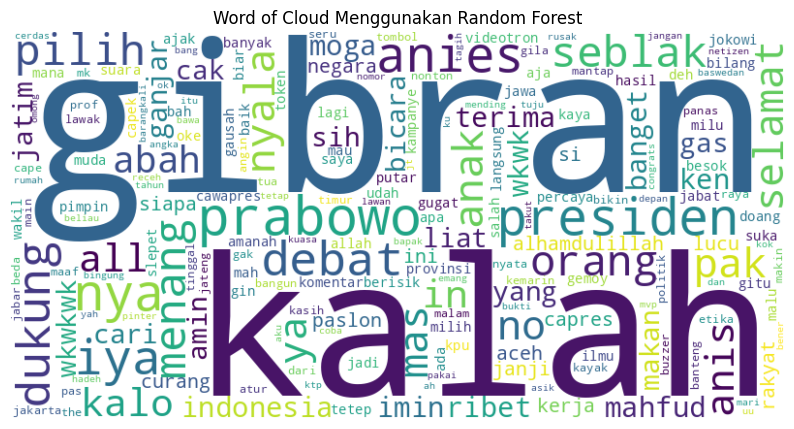

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

feature_names = vectorizerTf.get_feature_names_out()
# Mendapatkan vektor kata dari X_text hasil vektorisasi
X_text_array = X_text.toarray()

# Hitung word frequency
word_frequencies = dict(zip(feature_names, X_text_array.sum(axis=0)))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_frequencies)

# Plotting
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word of Cloud Menggunakan Random Forest')
plt.show()

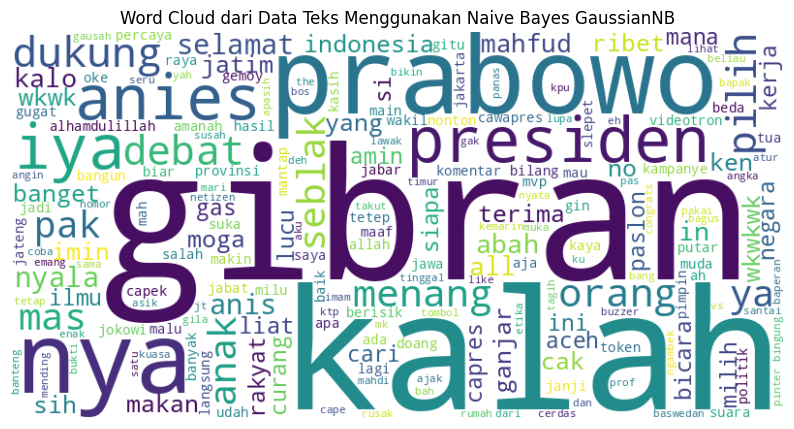

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Misalnya, untuk mendapatkan vektor kata dari X_train
X_train_array = X_train.toarray()

# Dapatkan fitur nama
feature_names = vectorizerTf.get_feature_names_out()

# Hitung bobot kata-kata
word_weights = dict(zip(feature_names, X_train_array.sum(axis=0)))

# Inisialisasi WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_weights)

# Plotting word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud dari Data Teks Menggunakan Naive Bayes GaussianNB')
plt.show()

In [ ]:
def predict_sentiment_with_model(text):
    # Ubah teks ke dalam format vektor TF-IDF
    text_tfidf = vectorizerTf.transform([text])

    # Prediksi menggunakan model Naive Bayes
    nb_prediction = nb_model.predict(text_tfidf)

    # Tentukan sentimen berdasarkan prediksi model
    if nb_prediction[0] == 1:
        return "Positif"
    else:
        return "Negatif"

while True:
    # Meminta masukan teks baru dari pengguna
    input_text = input("Masukkan kalimat: ")

    # Prediksi menggunakan model Naive Bayes
    sentiment_by_model = predict_sentiment_with_model(input_text)
    print("Sentimen dari kalimat '{}' berdasarkan model Naive Bayes adalah: {}".format(input_text, sentiment_by_model))

    # Menanyakan apakah ingin memprediksi teks lain
    repeat = input("Apakah ingin memprediksi teks lain? (yes/no): ").strip().lower()
    if repeat != 'yes':
        break

print("Program selesai.")

Masukkan kalimat: pbraowo menang
Sentimen dari kalimat 'pbraowo menang' berdasarkan model Naive Bayes adalah: Negatif
Apakah ingin memprediksi teks lain? (yes/no): yes
Masukkan kalimat: prabowo menang
Sentimen dari kalimat 'prabowo menang' berdasarkan model Naive Bayes adalah: Positif
Apakah ingin memprediksi teks lain? (yes/no): no
Program selesai.


In [ ]:
!pip install streamlit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 35.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.5 MB/s eta 0:00:00


In [ ]:
!pip install streamlit_lottie

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.4/802.4 kB 7.4 MB/s eta 0:00:00


In [ ]:
!wget -q -O - ipV4.icanhazip.com

34.16.227.46


In [ ]:
from google.colab import files
import joblib
joblib.dump(nb_model, 'nb_model.pkl')
joblib.dump(vectorizerTf, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

In [ ]:
!streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.16.227.46:8501

npx: installed 22 in 4.663s
your url is: https://funny-carrots-wash.loca.lt
  Stopping...
^C
